## Load the network constructor object

In [1]:
from ..plastic_prefix_network import PlasticPrefixNetwork

## Teach a few thousand words

learning word 0/10...
LEARNING:  >emma_
---END---
learning word 1/10...
LEARNING:  >olivia_
PREFIX COUNT :  {'>': {'count': 1, 'matches': ['>emma_']}}
CHECKING :  >
one level down doesn't exist, hence inserting at one level down.
insert >  at r_level -1 ...
adding node :  >  with data  {'count': 1, 'r_level': -1}
adding node :  >olivia_  with data  {'count': 0, 'r_level': 0}
adding edge :  >  ->  >olivia_  with data  {}
adding edge :  >  ->  >emma_  with data  {}
LIFTING R at:  >
LIFTING R at:  >olivia_
LIFTING R at:  >emma_
POTENTIATING at:  >olivia_
POTENTIATING at:  >
---END---
learning word 2/10...
LEARNING:  >ava_
PREFIX COUNT :  {'>': {'count': 2, 'matches': ['>emma_', '>olivia_']}}
CHECKING :  >
one level down does exist, hence finding out if should insert there or not
insert >  at r_level 0 ...
removing edge :  >  ->  >olivia_
removing edge :  >  ->  >emma_
adding node :  >  with data  {'count': 1, 'r_level': 0}
adding node :  >ava_  with data  {'count': 0, 'r_level': 1}
adding

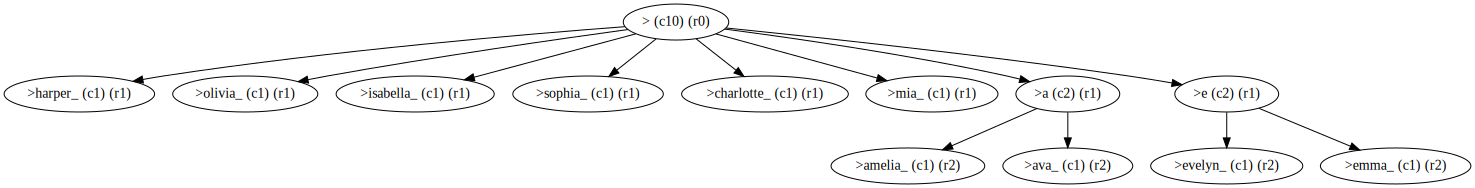

In [2]:
constructor = PlasticPrefixNetwork()
words = open("names.txt", "r").read().splitlines()[:10]
samples = [">" + x + "_" for x in words]
for i, word in enumerate(samples):
    print(f"learning word {i}/{len(samples)}...")
    constructor.learn(word)
constructor.visualize(with_counts=True, with_r_levels=True)

## Load an existing graph

In [3]:
constructor_new = PlasticPrefixNetwork()
constructor_new.load("32k_words.gpickle")

In [5]:
from utils import format_and_write_csv
format_and_write_csv(constructor_new.graph)

Writing complete
Writing complete


### Run an inference

REFACTORINGS:
STEP 0  --  >
FOUND!  0 ['>'] >
FIRST R LEVEL:  ['>']
STEP 1  --  >
EXACT MATCH FOUND. FORWARDING.
STEP 2  --  >
DESCENDANT: >harper_
DESCENDANT: >olivia_
DESCENDANT: >isabella_
DESCENDANT: >sophia_
DESCENDANT: >charlotte_
DESCENDANT: >mia_
DESCENDANT: >a
DESCENDANT: >e


/Users/sibeshkar/Maya/ml/repositories/plastic-memory/utils.py:7: RuntimeWarning: invalid value encountered in divide
  a_norm = np.nan_to_num((arr/arr.sum(axis=1)[:,None]).round(7))


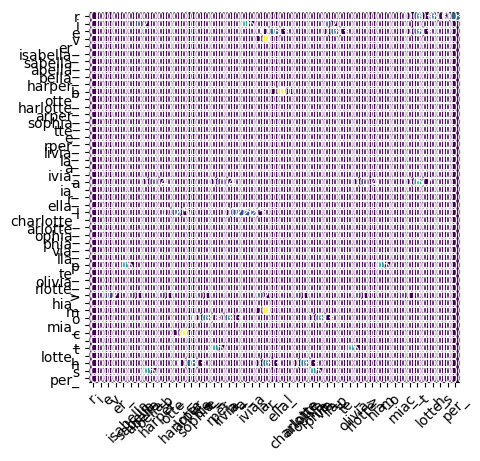

--- inferring for :  [37]
SAMPLES:  ['r', 'i', 'e', 'v', 'er_', 'isabella_', 'sabella_', 'abella_', 'bella_', 'harper_', 'b', 'otte_', 'harlotte_', 'arper_', 'sophia_', 'tte_', 'e_', 'rper_', 'livia_', 'la_', 'a_', 'ivia_', 'a', 'ia_', 'r_', 'ella_', 'l', 'charlotte_', 'arlotte_', 'ophia_', 'phia_', 'via_', 'lla_', 'p', 'te_', 'olivia_', 'rlotte_', '>', 'hia_', 'm', 'o', 'mia_', 'c', '_', 't', 'lotte_', 'h', 's', 'per_']
INFERENCE VECTOR: {'>': 1.0}
TESTING: [[0.  0.  0.2 0.  0.  0.1 0.  0.  0.  0.1 0.  0.  0.  0.  0.1 0.  0.  0.
  0.  0.  0.  0.  0.2 0.  0.  0.  0.  0.1 0.  0.  0.  0.  0.  0.  0.  0.1
  0.  0.  0.  0.  0.  0.1 0.  0.  0.  0.  0.  0.  0. ]] ['r', 'i', 'e', 'v', 'er_', 'isabella_', 'sabella_', 'abella_', 'bella_', 'harper_', 'b', 'otte_', 'harlotte_', 'arper_', 'sophia_', 'tte_', 'e_', 'rper_', 'livia_', 'la_', 'a_', 'ivia_', 'a', 'ia_', 'r_', 'ella_', 'l', 'charlotte_', 'arlotte_', 'ophia_', 'phia_', 'via_', 'lla_', 'p', 'te_', 'olivia_', 'rlotte_', '>', 'hia_', 'm', '

/Users/sibeshkar/Maya/ml/repositories/plastic-memory/utils.py:7: RuntimeWarning: invalid value encountered in divide
  a_norm = np.nan_to_num((arr/arr.sum(axis=1)[:,None]).round(7))


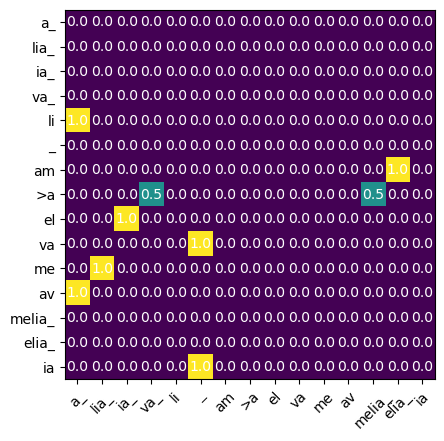

--- inferring for :  [7]
SAMPLES:  ['a_', 'lia_', 'ia_', 'va_', 'li', '_', 'am', '>a', 'el', 'va', 'me', 'av', 'melia_', 'elia_', 'ia']
INFERENCE VECTOR: {'>a': 1.0}
TESTING: [[0.  0.  0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.  0. ]] ['a_', 'lia_', 'ia_', 'va_', 'li', '_', 'am', '>a', 'el', 'va', 'me', 'av', 'melia_', 'elia_', 'ia']
INFERENCE RESULT: {'va_': 0.5, 'melia_': 0.5}
--- inference ended
['va_', 'melia_']
get_next_inference_string:  melia_ {'va_': 0.5, 'melia_': 0.5}
END RESULT:  >amelia_


In [3]:
constructor.infer(">")

## View learning times

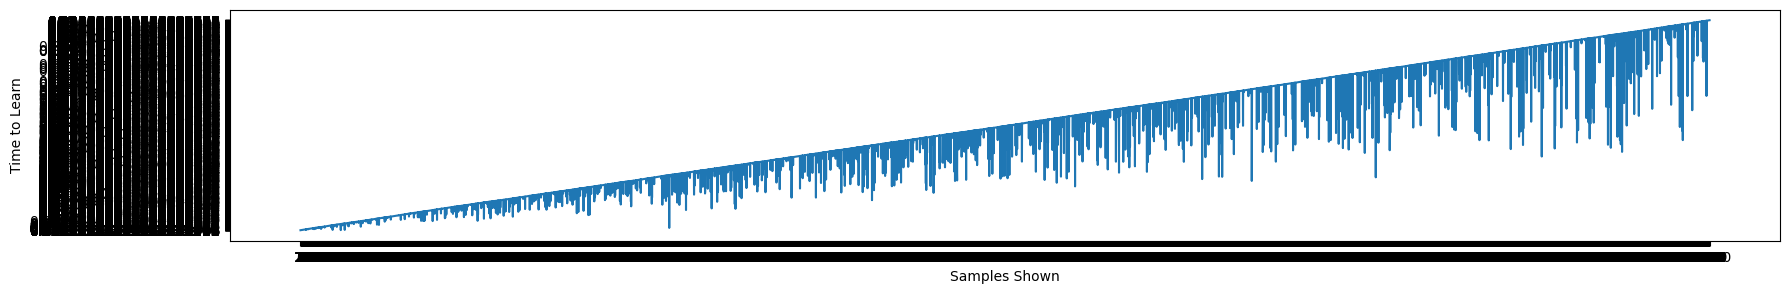

In [14]:
import csv
x_axis = []
y_axis = []
i = 0
limit = 10000
with open('32k_learning_times.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        x_axis.append(row['samples_shown'])
        y_axis.append(row['learning_time'])
        i += 1
        if i > limit:
            break

import matplotlib.pyplot as plt
# plt.rcParams["figure.figsize"] = (20,3)
# Plot the line graph
plt.plot(x_axis, y_axis)

# Add x and y labels
plt.xlabel('Samples Shown')
plt.ylabel('Time to Learn')

# Show the plot
plt.show()
